# 3 Inferences with binomials

In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-darkgrid')

print("Load packages")

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Load packages


## 3.1 Inferring a rate

In [59]:
# Set value
#k=5;n=10;
k = np.array([5])
n = np.array([10])

In [60]:
# Modeling
with pm.Model() as model_3_1:
    theat = pm.Beta ("theat", alpha=1, beta=1)
    kk = pm.Binomial ("k", n=n, p=theat, observed=k)
    trace_3_1=pm.sample(2000, tune=1000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theat_logodds__]
100%|██████████| 3000/3000 [00:01<00:00, 2006.51it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c191c4278>,
      dtype=object)

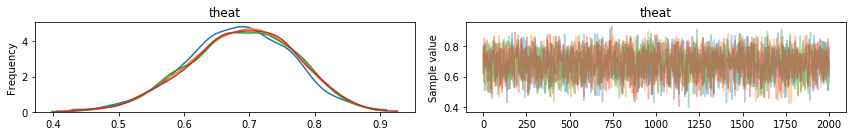

In [61]:
pm.traceplot(trace_3_1)

(8000,)


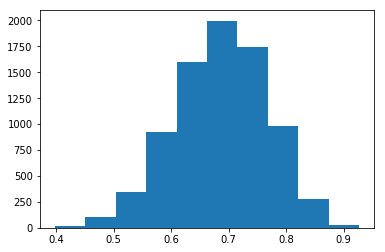

In [64]:
theat_set = trace_3_1['theat'];
print(theat_set.shape);
plt.hist(theat_set);

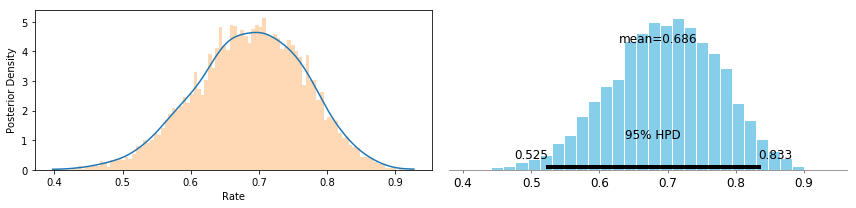

In [66]:
_, axes = plt.subplots(1, 2, figsize=(12, 3))
pm.kdeplot(trace_3_1['theat'], ax=axes[0])
axes[0].hist(trace_3_1['theat'], bins=100, normed=1, alpha=.3)
axes[0].set_xlabel('Rate')
axes[0].set_ylabel('Posterior Density')

pm.plot_posterior(trace_3_1['theat'], ax=axes[1], color='#87ceeb')
plt.tight_layout();

(array([ 10.,  37.,  92., 187., 229., 193., 141.,  81.,  25.,   5.]),
 array([0.10600631, 0.18774753, 0.26948874, 0.35122996, 0.43297118,
        0.5147124 , 0.59645362, 0.67819484, 0.75993606, 0.84167727,
        0.92341849]),
 <a list of 10 Patch objects>)

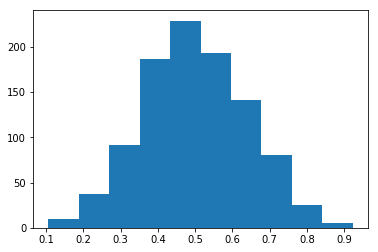

In [68]:
k=5;n=10;
a=1+k;
b=1+n-k;
theat_sample = stats.beta.rvs(a,b,size=1000)
plt.hist(theat_sample)

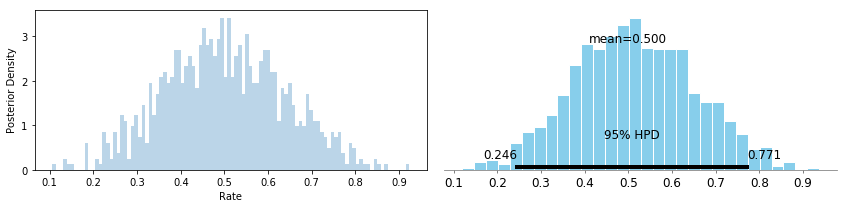

In [71]:
_, axes = plt.subplots(1, 2, figsize=(12, 3))

axes[0].hist(theat_sample, bins=100, normed=1, alpha=.3)
axes[0].set_xlabel('Rate')
axes[0].set_ylabel('Posterior Density')

pm.plot_posterior(theat_sample, ax=axes[1], color='#87ceeb')
plt.tight_layout();

In [77]:
pm.summary(trace_3_1, varnames=['theat']).round(3)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theat,0.686,0.08,0.001,0.525,0.833,3669.224,1.001


## 3.2 Difference between two rates

In [79]:
n1=n2=10;
k1=0;k2=7;

In [80]:
with pm.Model() as model_3_2:
    theat1 = pm.Beta ("theat1",1,1)
    theat2 = pm.Beta ("theat2",1,1)
    
    k1 = pm.Binomial ("k1",n1,theat1,observed=k1)
    k2 = pm.Binomial ("k2",n2,theat2,observed=k2)
    delta = pm. Deterministic("delta",theat1-theat2) 
    trace_3_2=pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theat2_logodds__, theat1_logodds__]
100%|██████████| 3000/3000 [00:01<00:00, 1604.19it/s]


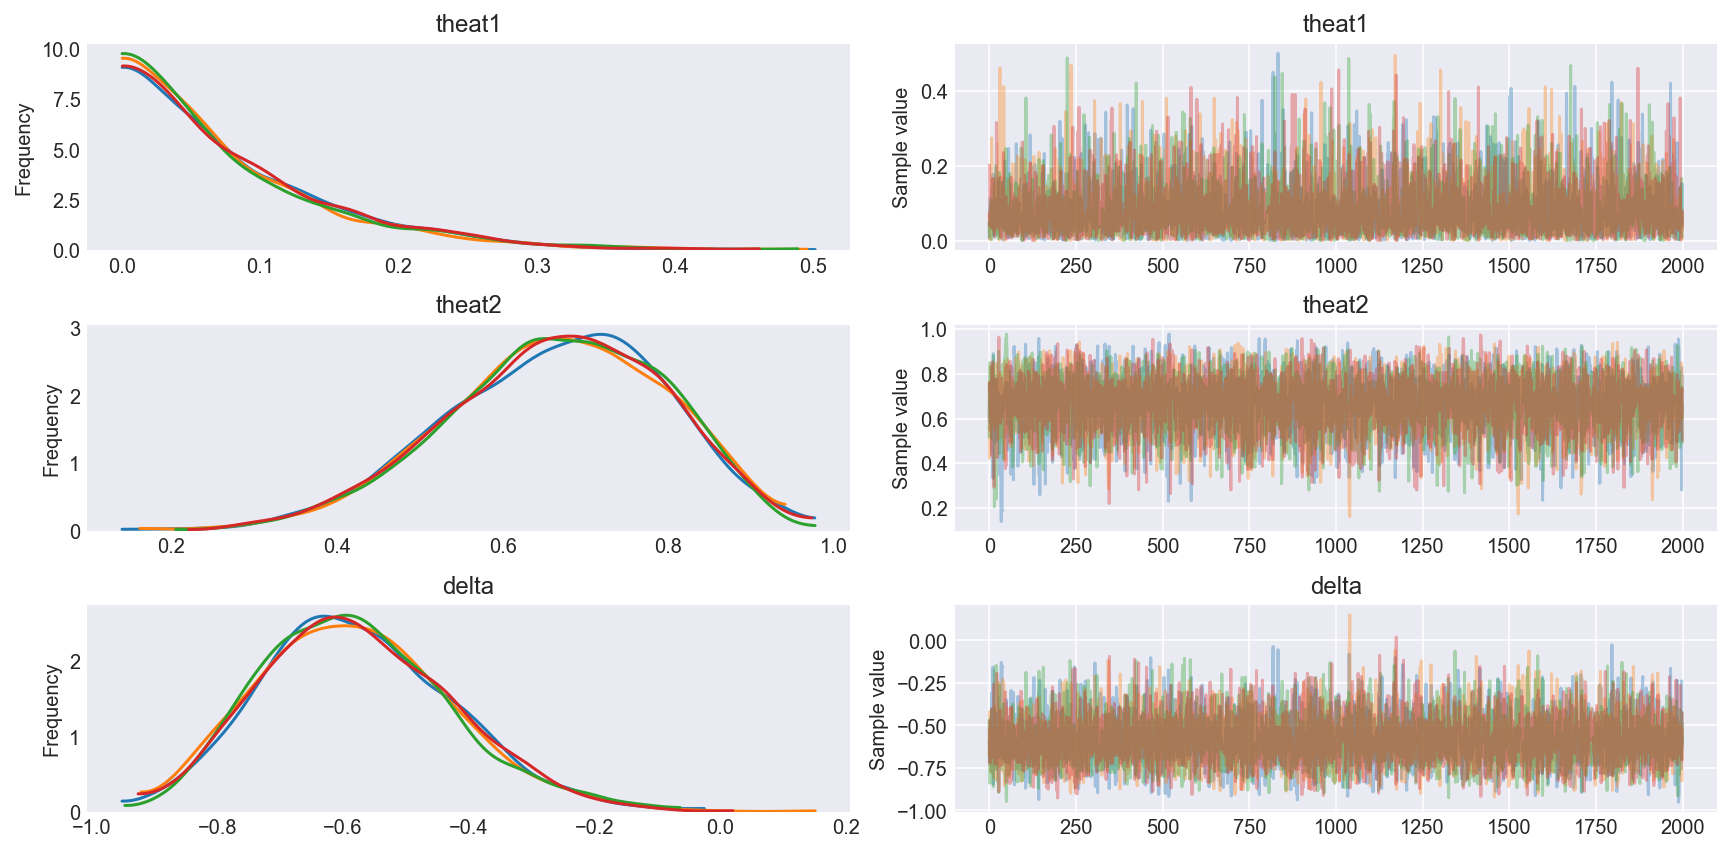

In [87]:
pm.traceplot(trace_3_2);

In [82]:
pm.summary(trace_3_2).round(3)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theat1,0.083,0.076,0.001,0.000,0.236,6785.461,1.0
theat2,0.662,0.131,0.002,0.413,0.909,6370.959,1.0
delta,-0.580,0.151,0.002,-0.872,-0.293,6518.434,1.0


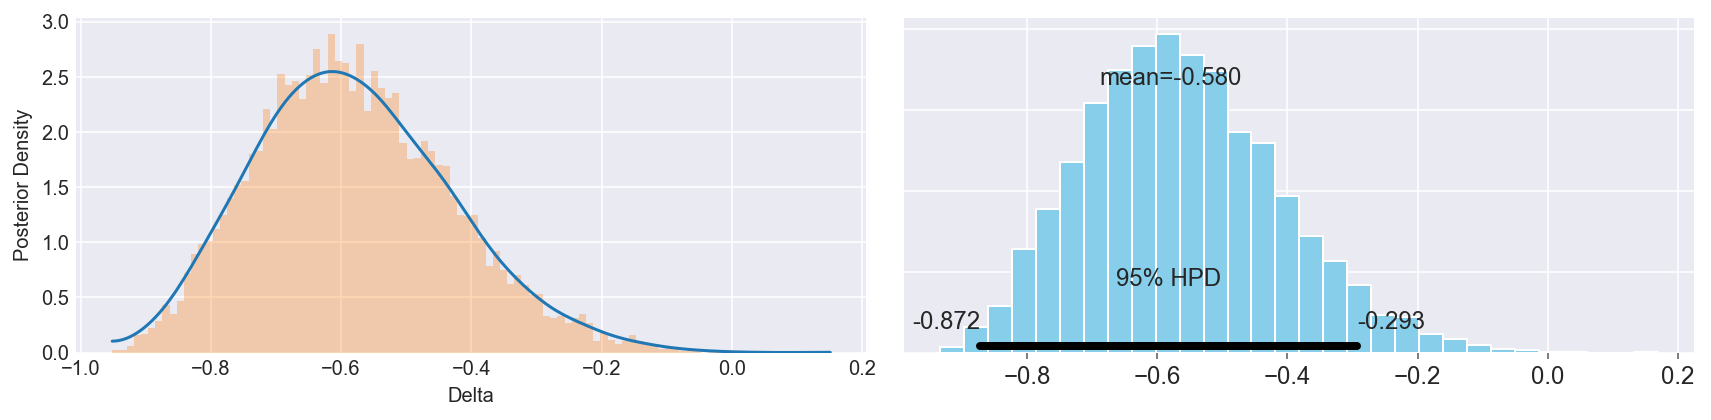

In [86]:
_, axes = plt.subplots(1, 2, figsize=(12, 3))
pm.kdeplot(trace_3_2['delta'], ax=axes[0])
axes[0].hist(trace_3_2['delta'], bins=100, normed=1, alpha=.3)
axes[0].set_xlabel('Delta')
axes[0].set_ylabel('Posterior Density')

pm.plot_posterior(trace_3_2['delta'], ax=axes[1], color='#87ceeb')
plt.tight_layout();

## 3.3 Inferring a common rate

In [95]:
# Multiple trials
k = np.array([14, 16])
n = np.array([20, 20])

In [96]:
with pm.Model() as model3:
    # prior
    theta = pm.Beta('theta', alpha=1, beta=1)
    # observed
    x = pm.Binomial('x', n=n, p=theta, observed=k)
    # inference
    trace_3_3 = pm.sample(1e3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_logodds__]
100%|██████████| 1500/1500.0 [00:00<00:00, 1757.22it/s]


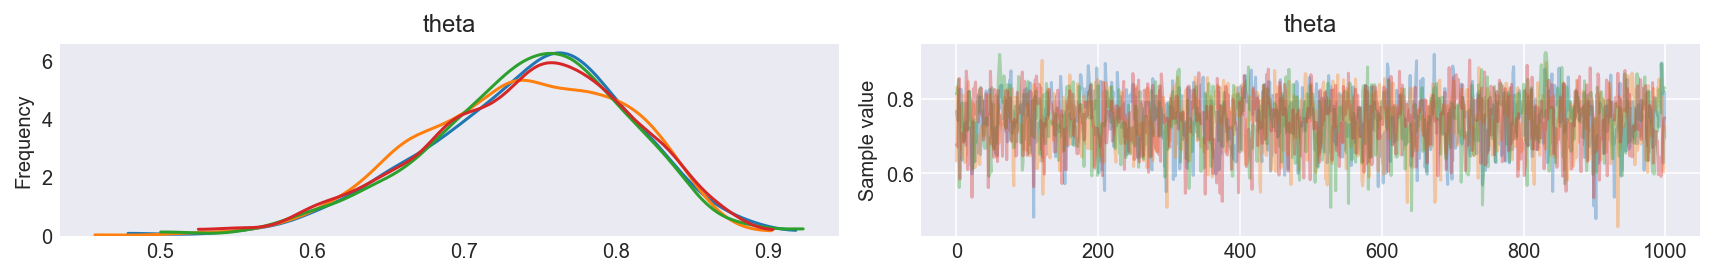

In [97]:
pm.traceplot(trace_3_3, varnames=['theta']);
pm.summary(trace_3_3).round(3);

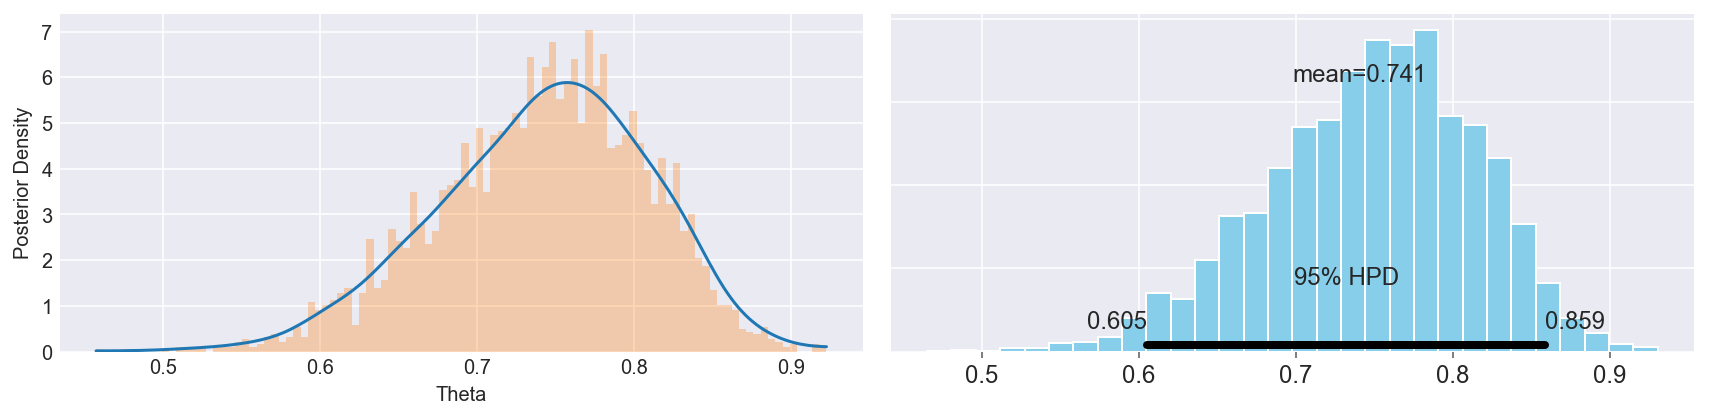

In [98]:
_, axes = plt.subplots(1, 2, figsize=(12, 3))
pm.kdeplot(trace_3_3['theta'], ax=axes[0])
axes[0].hist(trace_3_3['theta'], bins=100, normed=1, alpha=.3)
axes[0].set_xlabel('Theta')
axes[0].set_ylabel('Posterior Density')

pm.plot_posterior(trace_3_3['theta'], ax=axes[1], color='#87ceeb')
plt.tight_layout();

## 3.4 Prior and posterior prediction

In [99]:
k = 1
n = 15
# Uncomment for Trompetter Data
# k = 24
# n = 121

# prior only model - no observation
with pm.Model() as model_prior:
    theta = pm.Beta('theta', alpha=1, beta=1)
    x = pm.Binomial('x', n=n, p=theta)
    trace_prior = pm.sample(1000, compute_convergence_checks=False)
    
# with observation
with pm.Model() as model_obs:
    theta = pm.Beta('theta', alpha=1, beta=1)
    x = pm.Binomial('x', n=n, p=theta, observed=k)
    trace_obs = pm.sample(1000)
    
# prediction (sample from trace)
ppc = pm.sample_ppc(trace_obs, samples=500, model=model_obs)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [theta_logodds__]
>Metropolis: [x]
100%|██████████| 1500/1500 [00:01<00:00, 1344.84it/s]
The acceptance probability does not match the target. It is 0.719243047571269, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7089279484597473, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_logodds__]
100%|██████████| 1500/1500 [00:00<00:00, 2079.87it/s]
The acceptance probability does not match the target. It is 0.8882771629236422, but should be close to 0.8. Try to increase the number of tuning steps.
100%|██████████| 500/500 [00:00<00:00, 4863.90it/s]


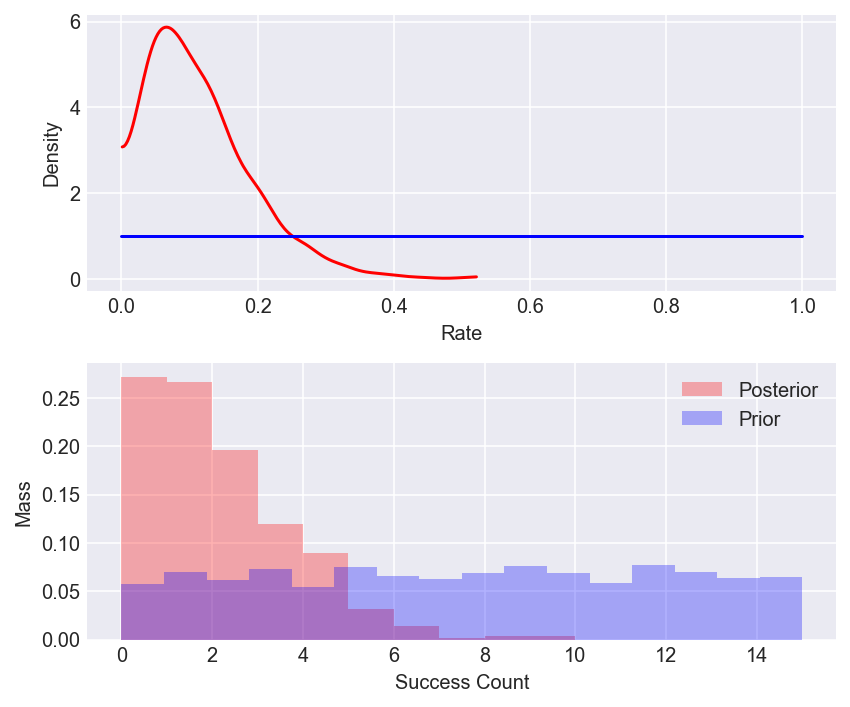

In [100]:
from scipy.stats import beta

prior_x = trace_prior['x']
pred_theta = trace_obs['theta']

_, axes = plt.subplots(2, 1, figsize=(6, 5))

pm.kdeplot(pred_theta, ax=axes[0], color='r', label='Posterior')
x = np.linspace(0, 1, 100)
axes[0].plot(x, beta.pdf(x, 1, 1), color='b', label='Prior')
axes[0].set_xlabel('Rate')
axes[0].set_ylabel('Density')

predictx = ppc['x']
axes[1].hist(predictx, normed=1, bins=len(np.unique(predictx)), 
         alpha=.3, color='r', label='Posterior')
axes[1].hist(prior_x, normed=1, bins=n+1, 
         alpha=.3, color='b', label='Prior')
axes[1].set_xlabel('Success Count')
axes[1].set_ylabel('Mass')

plt.legend()
plt.tight_layout();

## 3.5 Posterior prediction

----
One important use of posterior predictive distributions is to examine the descriptive adequacy of a model. It can be viewed as a set of predictions about what data the model expects to see, based on the posterior distribution over parameters. If these predictions do not match the data already seen, the model is descriptively inadequate.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_logodds__]
100%|██████████| 500/500 [00:00<00:00, 2842.78it/s]


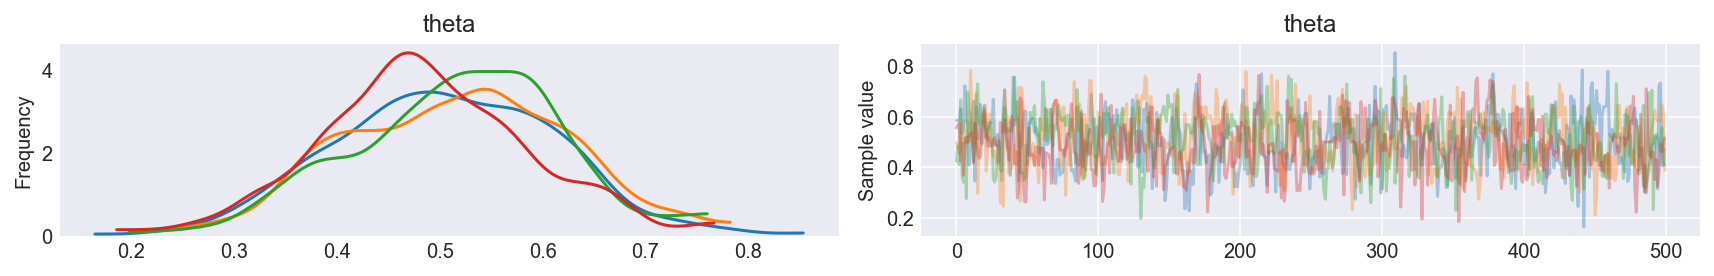

In [8]:
# Inferring a Common Rate, With Posterior Predictive
k1 = 0
n1 = 10
k2 = 10
n2 = 10

with pm.Model() as model_3_5:
    # prior
    theta = pm.Beta('theta', alpha=1, beta=1)
    # observed
    x1 = pm.Binomial('x1', n=n2, p=theta, observed=k1)
    x2 = pm.Binomial('x2', n=n2, p=theta, observed=k2)
    # inference
    trace_3_5 = pm.sample()

pm.traceplot(trace_3_5, varnames=['theta']);
# prediction (sample from trace)
# Generate posterior predictive samples from a model given a trace.
ppc_3_5 = pm.sample_ppc(trace_3_5, samples=500, model=model_3_5)

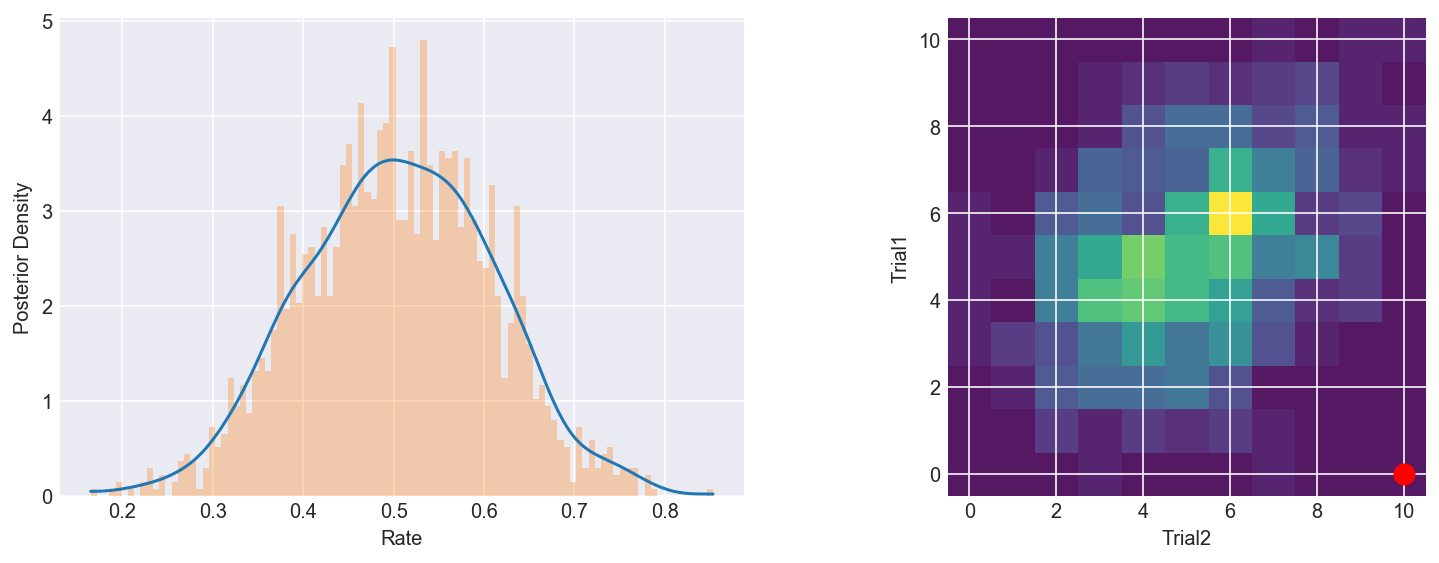

In [9]:
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 4)) 
gs = gridspec.GridSpec(1,2, width_ratios=[2, 3]) 
ax0 = plt.subplot(gs[0])

pm.kdeplot(trace_3_5['theta'], ax=ax0)
ax0.hist(trace_3_5['theta'], bins=100, normed=1, alpha=.3)
plt.xlabel('Rate')
plt.ylabel('Posterior Density')

ax1 = plt.subplot(gs[1])
predx1 = ppc_3_5['x1']
predx2 = ppc_3_5['x2']

from scipy import sparse
A = sparse.csc_matrix((np.ones(len(predx1)), (predx1, predx2)), 
                      shape=(n1+1, n2+1)).todense()
ax1.imshow(A, alpha=.9, origin='lower', cmap='viridis')
ax1.scatter(k2, k1, s=100, c=[1,0,0])
plt.xlabel('Trial2')
plt.ylabel('Trial1')
plt.tight_layout();

---
The left panel shows the posterior distribution over the common rate θ for two binary processes, which gives density to values near 0.5. 
The right panel shows the posterior predictive distribution of the model, with respect to the two success counts. 
The size of each square is proportional to the predictive mass given to each possible combination of success count observations. 
The actual data observed in this example, with 0 and 10 successes for the two counts, are shown by the cross.

## 3.6 Joint distributions

In [10]:
# the Survey example in the book
k = np.array([16, 18, 22, 25, 27])
nmax = 500
m = len(k)

In [11]:
# Model
with pm.Model() as model_3_6:
    # prior
    theta = pm.Beta('theta', alpha=1,beta=1)
    TotalN = pm.DiscreteUniform('TotalN', lower=1, upper=nmax)
    # observed
    x = pm.Binomial('x', n=TotalN, p=theta, observed=k)
    # inference
    trace_3_6 = pm.sample(1e4, cores=2)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [theta_logodds__]
>Metropolis: [TotalN]
100%|██████████| 10500/10500.0 [00:05<00:00, 2028.75it/s]
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.35136743881531246, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


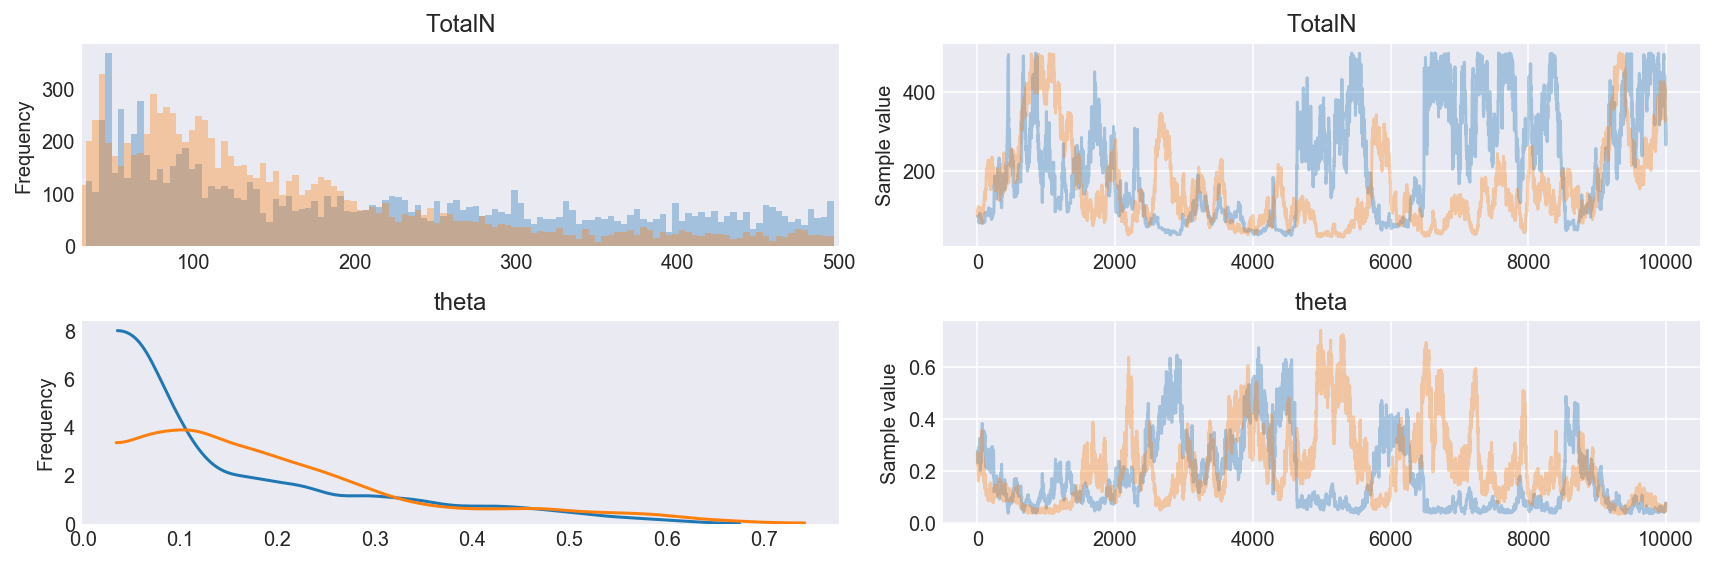

In [12]:
pm.traceplot(trace_3_6);

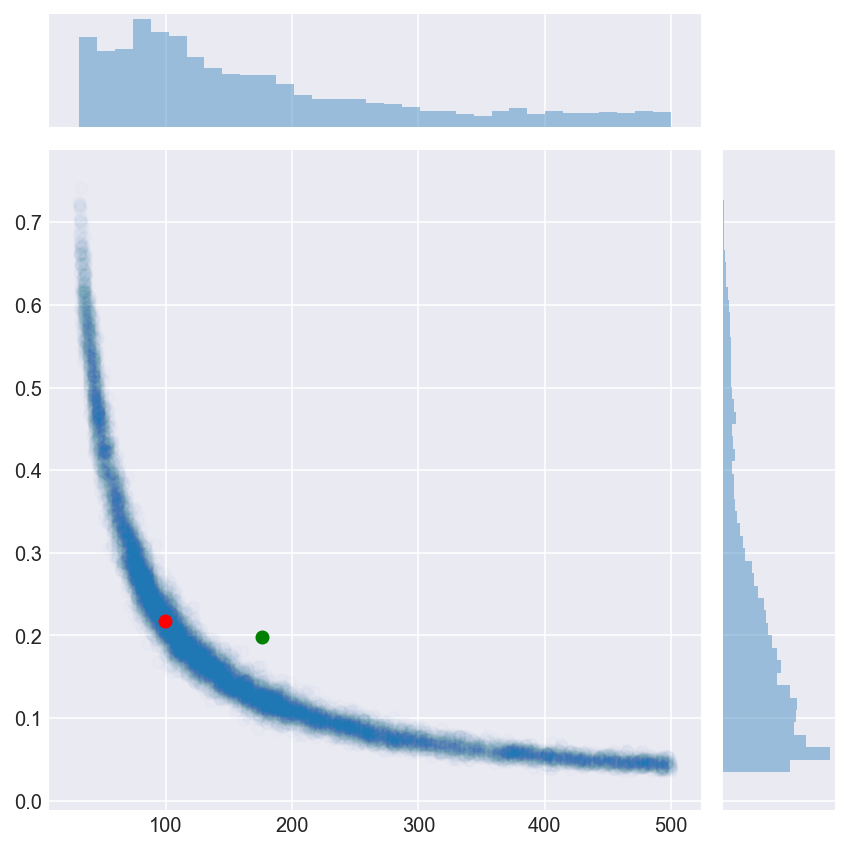

In [20]:
burnin = 9000
thetapost = trace_3_6['theta'][burnin:]
npost = trace_3_6['TotalN'][burnin:]

g = sns.jointplot(npost, thetapost, kind='scatter', stat_func=None, alpha=.01);

from scipy.special import gammaln
cc = -float('Inf')
ind = 0


for i in range(0, len(npost)):
    logL = 0
    for j in k:   
        logL = logL+gammaln(npost[i]+1)-gammaln(j+1)-gammaln(npost[i] - j +1)
        logL = logL+j*np.log(thetapost[i])+(npost[i]-j)*np.log(1-thetapost[i])
    
    if logL > cc: 
        ind = i
        cc = logL
        
# mean plot
g.ax_joint.plot(np.mean(npost), np.mean(thetapost), 'o', color='g')
# Mode plot
g.ax_joint.plot(npost[ind], thetapost[ind], 'o', color='r');


---
It is clear that the joint posterior distribution carries more information than the marginal posterior distributions. 
This is very important. 
It means that just looking at the marginal distributions will not give a complete account of the inferences made, and may provide a misleading account.

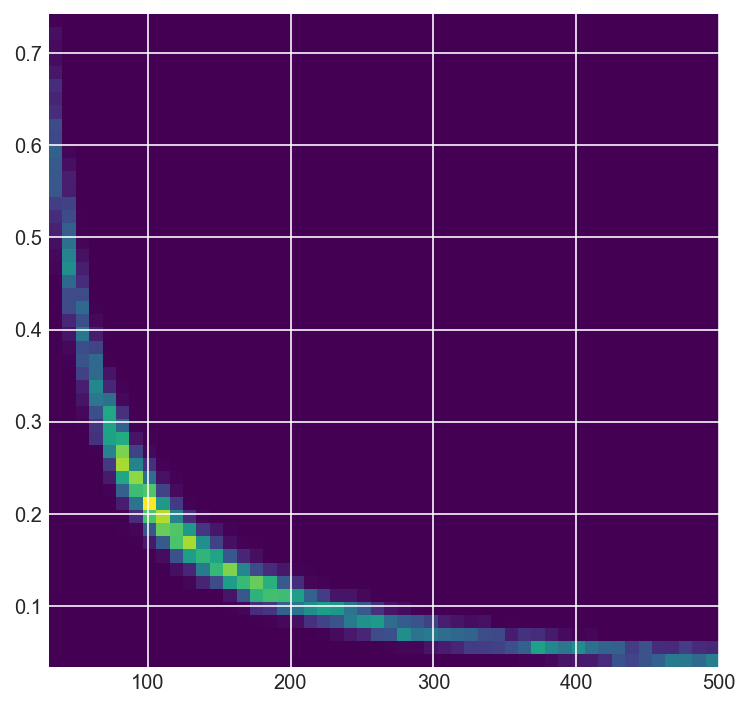

In [21]:
plt.figure(1, figsize=(6, 6))
plt.hist2d(npost, thetapost, bins=50, cmap='viridis');

### Note from Junpeng Lao
---
It is obvious from the above posterior plot that the geometry of the posterior is quite nasty. 
We can see that in the trace as well: the mixing is quite poor, with strong autocorrelation. 
There is no divergence warning, but it could just be that PyMC3 is mixing Metropolis and NUTS together due to the discrete variable. 
In this particular case, it is not a big deal as we can visualize the posterior directly. 
However, when we are sampling larger model, it is definitely going to be a problem. Actually, we don't necessary need to use DiscreteUniform for TotalN, as the computation of logp in Binomial doesn't require n to be int.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [TotalN_interval__, theta_logodds__]
100%|██████████| 2000/2000.0 [00:11<00:00, 172.23it/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


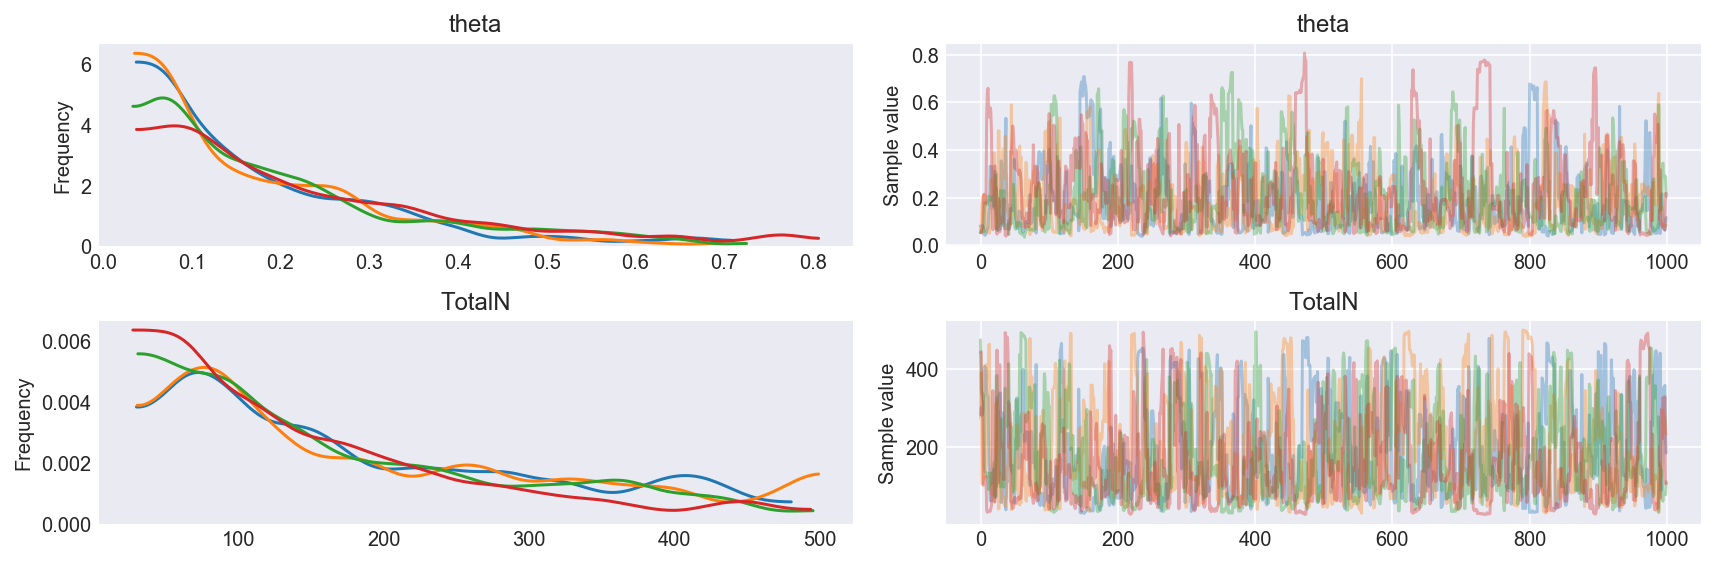

In [22]:
with pm.Model() as model_3_6_:
    # prior
    theta = pm.Beta('theta', alpha=1,beta=1)
    TotalN = pm.Uniform('TotalN', lower=1, upper=nmax)
    # observed
    x = pm.Binomial('x', n=TotalN, p=theta, observed=k)
    # inference
    trace_3_6_ = pm.sample(1e3, tune=1000, cores=4, nuts_kwargs = {'target_accept' : 0.99})

pm.traceplot(trace_3_6_);

Number of Divergent 13
Percentage of Divergent 0.01300


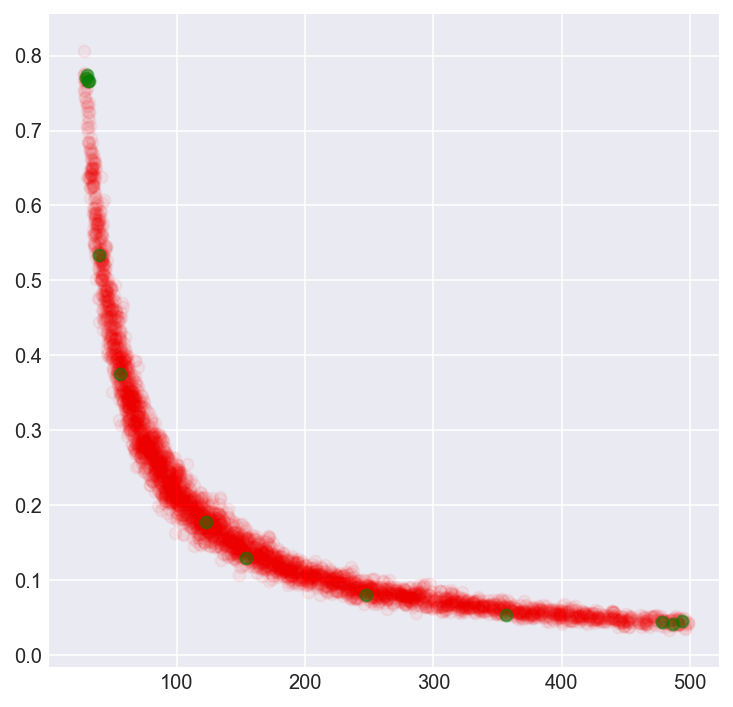

In [26]:
# display the total number and percentage of divergent
divergent = trace_3_6_['diverging']
print('Number of Divergent %d' % divergent.nonzero()[0].size)
divperc = divergent.nonzero()[0].size/len(trace_3_6_)
print('Percentage of Divergent %.5f' % divperc)

# scatter plot between theta and N
# for the identifcation of the problematic neighborhoods in parameter space
theta_tr = trace_3_6_['theta']
totaln_tr = trace_3_6_['TotalN']
plt.figure(figsize=(6, 6))
plt.scatter(totaln_tr[divergent == 0], theta_tr[divergent == 0], color='r', alpha=.05)
plt.scatter(totaln_tr[divergent == 1], theta_tr[divergent == 1], color='g', alpha=.5);